In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('../data/processed/Mens-Volleyball-PlusLiga-2008-2023.csv')

In [4]:
df.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,...,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner
0,"01.10.2022, 14:45",AZS Olsztyn,ZAKSA Kędzierzyn-Koźle,1,3,60.0,17.0,11.0,79.0,18,...,26%,88,7,7,45,51%,35%,14,11,1
1,"30.09.2022, 17:30",Jastrzębski Węgiel,GKS Katowice,3,0,51.0,17.0,27.0,77.0,15,...,20%,91,8,4,43,47%,34%,1,17,0
2,"01.10.2022, 20:30",LUK Lublin,Czarni Radom,2,3,76.0,23.0,35.0,109.0,16,...,18%,128,10,10,63,49%,33%,10,13,1
3,"02.10.2022, 14:45",Warta Zawiercie,PGE Skra Bełchatów,3,2,66.0,16.0,22.0,98.0,21,...,9%,102,9,9,56,54%,37%,7,14,0
4,"03.10.2022, 17:30",BBTS Bielsko-Biała,Cuprum Lubin,1,3,63.0,22.0,17.0,100.0,19,...,22%,109,7,8,58,53%,39%,10,10,1


In [5]:
df.dtypes

Date                 object
Team_1               object
Team_2               object
T1_Score              int64
T2_Score              int64
T1_Sum              float64
T1_BP               float64
T1_Ratio            float64
T1_Srv_Sum          float64
T1_Srv_Err           object
T1_Srv_Ace          float64
T1_Srv_Eff           object
T1_Rec_Sum          float64
T1_Rec_Err          float64
T1_Rec_Pos           object
T1_Rec_Perf          object
T1_Att_Sum           object
T1_Att_Err          float64
T1_Att_Blk          float64
T1_Att_Kill         float64
T1_Att_Kill_Perc     object
T1_Att_Eff           object
T1_Blk_Sum          float64
T1_Blk_As            object
T2_Sum                int64
T2_BP                 int64
T2_Ratio              int64
T2_Srv_Sum            int64
T2_Srv_Err           object
T2_Srv_Ace            int64
T2_Srv_Eff           object
T2_Rec_Sum            int64
T2_Rec_Err            int64
T2_Rec_Pos           object
T2_Rec_Perf          object
T2_Att_Sum          

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y, %H:%M')

In [7]:
# Take care of the percentages
perc_cols = ['T1_Srv_Eff', 'T1_Rec_Pos', 'T1_Rec_Perf', 'T1_Att_Kill_Perc', 'T1_Att_Eff', 'T1_Att_Sum', 'T2_Srv_Eff', 'T2_Rec_Pos', 'T2_Rec_Perf', 'T2_Att_Kill_Perc', 'T2_Att_Eff', 'T2_Att_Sum']
for col in perc_cols:
    df[col] = pd.to_numeric(df[col].str.replace('%', ''))

In [8]:
# Some values use ',' instead of '.' when representing a float
float_cols = ['T1_Srv_Err', 'T1_Blk_As', 'T2_Srv_Err', 'T2_Blk_As']
for col in float_cols:
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'))

In [9]:
df.dtypes

Date                datetime64[ns]
Team_1                      object
Team_2                      object
T1_Score                     int64
T2_Score                     int64
T1_Sum                     float64
T1_BP                      float64
T1_Ratio                   float64
T1_Srv_Sum                 float64
T1_Srv_Err                 float64
T1_Srv_Ace                 float64
T1_Srv_Eff                   int64
T1_Rec_Sum                 float64
T1_Rec_Err                 float64
T1_Rec_Pos                   int64
T1_Rec_Perf                  int64
T1_Att_Sum                   int64
T1_Att_Err                 float64
T1_Att_Blk                 float64
T1_Att_Kill                float64
T1_Att_Kill_Perc             int64
T1_Att_Eff                   int64
T1_Blk_Sum                 float64
T1_Blk_As                  float64
T2_Sum                       int64
T2_BP                        int64
T2_Ratio                     int64
T2_Srv_Sum                   int64
T2_Srv_Err          

In [10]:
df.sort_values('Date', ascending=True, inplace=True)
df.reset_index(inplace=True, drop=True)
df['Match_id'] = df.index
df.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,...,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner,Match_id
0,2008-10-10 18:00:00,AZS Olsztyn,Jadar Radom,3,0,55.0,74.0,2.0,10.0,0.67,...,27,74,4,9,37,50,6,2.0,0,0
1,2008-10-11 15:00:00,Asseco Resovia,ZAKSA Kędzierzyn-Koźle,2,3,75.0,106.0,7.0,11.0,1.40,...,33,143,15,13,57,40,7,1.4,1,1
2,2008-10-11 17:00:00,Jastrzębski Węgiel,Chemik Bydgoszcz,3,1,86.0,111.0,9.0,19.0,2.25,...,34,102,5,14,48,47,4,1.0,0,2
3,2008-10-12 15:00:00,Trefl Gdańsk,PGE Skra Bełchatów,1,3,62.0,90.0,3.0,12.0,0.75,...,39,107,8,6,62,58,10,2.5,1,3
4,2008-10-13 18:00:00,AZS Częstochowa,Projekt Warszawa,2,3,66.0,103.0,2.0,19.0,0.40,...,36,124,11,11,57,46,16,3.2,1,4


In [11]:
len(df)

2639

In [12]:
# Matches should have between 3 and 5 sets
df['sets'] = df['T1_Score'] + df['T2_Score']
df[(df['sets'] < 3) | (df['sets'] > 5)]

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,...,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner,Match_id,sets


In [13]:
# Make averages per set (The longer the game goes, the sum of different statistics is larger)
set_divisible_cols = ['T1_Sum', 'T1_BP', 'T1_Srv_Sum', 'T1_Srv_Err', 'T1_Srv_Ace', 'T1_Rec_Sum', 'T1_Rec_Err', 'T1_Att_Sum', 'T1_Att_Err', 'T1_Att_Blk', 'T1_Att_Kill', 'T1_Blk_Sum', 'T1_Blk_As',
                      'T2_Sum', 'T2_BP', 'T2_Srv_Sum', 'T2_Srv_Err', 'T2_Srv_Ace', 'T2_Rec_Sum', 'T2_Rec_Err', 'T2_Att_Sum', 'T2_Att_Err', 'T2_Att_Blk', 'T2_Att_Kill', 'T2_Blk_Sum', 'T2_Blk_As']
set_divisible_new_cols = [f'{c}_SAvg' for c in set_divisible_cols]
df[set_divisible_new_cols] = df[set_divisible_cols].div(df['sets'], axis=0)

In [14]:
# Separate team 1 and team 2
t1_df = pd.concat([df[['Match_id', 'Date', 'Team_1', 'T1_Score']], df.loc[:, 'T1_Sum': 'T1_Blk_As'], df.loc[:, 'T1_Sum_SAvg':'T1_Blk_As_SAvg']], axis=1)
t2_df = pd.concat([df[['Match_id', 'Date', 'Team_2', 'T2_Score']], df.loc[:, 'T2_Sum': 'T2_Blk_As'], df.loc[:, 'T2_Sum_SAvg':'T2_Blk_As_SAvg']], axis=1)
t1_df['Opponent'] = df['Team_2']
t2_df['Opponent'] = df['Team_1']

In [15]:
new_col_names = {x: y for x, y in zip(t2_df.columns, t1_df.columns)}
team_perf_df = pd.concat([t1_df, t2_df.rename(columns=new_col_names)])
team_perf_df.columns = team_perf_df.columns.str.replace('T1_', '')

In [16]:
team_perf_df.sort_values('Date', ascending=False)

,Match_id,Date,Team_1,Score,Sum,BP,Ratio,Srv_Sum,Srv_Err,Srv_Ace,...,Srv_Ace_SAvg,Rec_Sum_SAvg,Rec_Err_SAvg,Att_Sum_SAvg,Att_Err_SAvg,Att_Blk_SAvg,Att_Kill_SAvg,Blk_Sum_SAvg,Blk_As_SAvg,Opponent
2638,2638,2023-03-05 14:45:00,Projekt Warszawa,3,71.0,30.0,37.0,97.0,20.00,8.0,...,2.000000,16.250000,1.500000,21.000000,1.750000,1.000000,11.75,4.00,1.500000,LUK Lublin
2638,2638,2023-03-05 14:45:00,LUK Lublin,1,51.0,17.0,17.0,81.0,16.00,6.0,...,1.500000,19.250000,2.000000,26.750000,2.250000,4.000000,10.25,1.00,2.500000,Projekt Warszawa
2637,2637,2023-03-04 20:30:00,ZAKSA Kędzierzyn-Koźle,3,63.0,27.0,33.0,97.0,16.00,7.0,...,1.750000,16.250000,2.250000,21.000000,1.250000,1.500000,10.75,3.25,2.000000,Cuprum Lubin
2637,2637,2023-03-04 20:30:00,Cuprum Lubin,1,63.0,19.0,25.0,88.0,23.00,9.0,...,2.250000,20.250000,1.750000,24.000000,1.750000,3.250000,12.00,1.50,2.500000,ZAKSA Kędzierzyn-Koźle
2636,2636,2023-03-04 17:30:00,Jastrzębski Węgiel,3,74.0,31.0,48.0,96.0,17.00,9.0,...,2.250000,14.250000,1.750000,19.250000,0.250000,1.000000,14.50,1.75,1.000000,Ślepsk Malow Suwałki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2,2008-10-11 17:00:00,Chemik Bydgoszcz,1,64.0,97.0,12.0,18.0,3.00,92.0,...,23.000000,8.250000,10.500000,8.500000,25.500000,1.250000,3.50,1.00,0.250000,Jastrzębski Węgiel
1,1,2008-10-11 15:00:00,ZAKSA Kędzierzyn-Koźle,3,70.0,98.0,6.0,14.0,1.20,98.0,...,19.600000,5.200000,12.800000,6.600000,28.600000,3.000000,2.60,1.40,0.280000,Asseco Resovia
1,1,2008-10-11 15:00:00,Asseco Resovia,2,75.0,106.0,7.0,11.0,1.40,83.0,...,16.600000,6.000000,9.600000,7.800000,26.200000,2.400000,1.40,2.60,0.520000,ZAKSA Kędzierzyn-Koźle
0,0,2008-10-10 18:00:00,AZS Olsztyn,3,55.0,74.0,2.0,10.0,0.67,60.0,...,20.000000,4.666667,13.333333,10.333333,27.000000,2.000000,2.00,3.00,1.000000,Jadar Radom


In [17]:
def rolling_average(group, cols, new_cols):
    group = group.sort_values('Date')
    rolling_stats = group[cols].rolling(4, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [18]:
roll_col_names = list(team_perf_df.columns)[3:-1]
roll_new_col_names = [f'{c}_rolling' for c in roll_col_names]

In [19]:
matches_rolling = team_perf_df.groupby('Team_1').apply(lambda x: rolling_average(x, roll_col_names, roll_new_col_names))
matches_rolling = matches_rolling.droplevel('Team_1')
matches_rolling = matches_rolling.drop(roll_col_names[1:], axis=1)

In [20]:
matches_rolling.sort_values('Date', ascending=False).head()

,Match_id,Date,Team_1,Score,Opponent,Score_rolling,Sum_rolling,BP_rolling,Ratio_rolling,Srv_Sum_rolling,...,Srv_Err_SAvg_rolling,Srv_Ace_SAvg_rolling,Rec_Sum_SAvg_rolling,Rec_Err_SAvg_rolling,Att_Sum_SAvg_rolling,Att_Err_SAvg_rolling,Att_Blk_SAvg_rolling,Att_Kill_SAvg_rolling,Blk_Sum_SAvg_rolling,Blk_As_SAvg_rolling
2638,2638,2023-03-05 14:45:00,Projekt Warszawa,3,LUK Lublin,3.00,64.50,24.75,36.00,88.75,...,4.312500,1.416667,16.729167,1.604167,22.041667,1.291667,1.270833,13.145833,2.666667,2.500000
2638,2638,2023-03-05 14:45:00,LUK Lublin,1,Projekt Warszawa,1.00,52.25,19.25,27.00,76.00,...,4.020833,1.791667,18.354167,1.625000,24.166667,1.520833,2.375000,11.354167,1.750000,2.479167
2637,2637,2023-03-04 20:30:00,Cuprum Lubin,1,ZAKSA Kędzierzyn-Koźle,2.25,66.75,20.75,31.25,88.25,...,4.483333,0.983333,17.666667,1.216667,23.483333,2.200000,2.450000,11.966667,1.766667,2.766667
2637,2637,2023-03-04 20:30:00,ZAKSA Kędzierzyn-Koźle,3,Cuprum Lubin,2.00,60.25,25.50,28.50,85.25,...,3.437500,1.625000,18.500000,1.916667,26.562500,2.500000,2.520833,12.687500,2.229167,2.812500
2636,2636,2023-03-04 17:30:00,Ślepsk Malow Suwałki,1,Jastrzębski Węgiel,2.75,57.50,23.25,34.50,85.75,...,4.183333,2.083333,15.916667,1.100000,22.766667,0.850000,1.666667,12.416667,2.300000,2.100000


In [21]:
# 4 matches for each team should have been dropped because of our rolling average
len(matches_rolling) + matches_rolling['Team_1'].nunique() * 4 == len(team_perf_df)

True

In [22]:
len(matches_rolling)

5186

In [23]:
matches_rolling['Team_1'].nunique()

23

In [24]:
merged_df = matches_rolling.merge(matches_rolling, left_on=['Match_id', 'Date', 'Team_1'], right_on=['Match_id', 'Date', 'Opponent'], suffixes=('_T1', '_T2')).drop_duplicates('Match_id')
merged_df['Winner'] = merged_df.apply(lambda row: 0 if row.Score_T1 > row['Score_T2'] else 1, axis=1)
merged_df = merged_df.drop(['Team_1_T2', 'Opponent_T2'], axis=1)

In [40]:
merged_df.sort_values('Date', ascending=False).head()

,Match_id,Date,Team_1_T1,Score_T1,Opponent_T1,Score_rolling_T1,Sum_rolling_T1,BP_rolling_T1,Ratio_rolling_T1,Srv_Sum_rolling_T1,...,Srv_Ace_SAvg_rolling_T2,Rec_Sum_SAvg_rolling_T2,Rec_Err_SAvg_rolling_T2,Att_Sum_SAvg_rolling_T2,Att_Err_SAvg_rolling_T2,Att_Blk_SAvg_rolling_T2,Att_Kill_SAvg_rolling_T2,Blk_Sum_SAvg_rolling_T2,Blk_As_SAvg_rolling_T2,Winner
2722,2638,2023-03-05 14:45:00,LUK Lublin,1,Projekt Warszawa,1.00,52.25,19.25,27.00,76.00,...,1.416667,16.729167,1.604167,22.041667,1.291667,1.270833,13.145833,2.666667,2.500000,1
1776,2637,2023-03-04 20:30:00,Cuprum Lubin,1,ZAKSA Kędzierzyn-Koźle,2.25,66.75,20.75,31.25,88.25,...,1.625000,18.500000,1.916667,26.562500,2.500000,2.520833,12.687500,2.229167,2.812500,1
2672,2636,2023-03-04 17:30:00,Jastrzębski Węgiel,3,Ślepsk Malow Suwałki,2.50,61.50,27.00,35.25,85.50,...,2.083333,15.916667,1.100000,22.766667,0.850000,1.666667,12.416667,2.300000,2.100000,0
1050,2635,2023-03-04 14:45:00,Asseco Resovia,0,Warta Zawiercie,2.50,65.25,23.25,31.00,92.25,...,1.733333,15.712500,1.500000,23.758333,1.266667,1.750000,12.666667,2.191667,3.083333,1
630,2634,2023-03-03 17:30:00,AZS Olsztyn,3,Barkom Każany Lwów,1.25,61.00,20.00,30.00,87.00,...,1.083333,20.750000,2.833333,23.583333,2.416667,2.333333,10.166667,2.000000,1.750000,0


In [35]:
final_df = merged_df.drop(['Sum_rolling_T1', 'BP_rolling_T1', 'Srv_Sum_rolling_T1', 'Srv_Err_rolling_T1', 'Srv_Ace_rolling_T1', 'Rec_Sum_rolling_T1', 'Rec_Err_rolling_T1', 'Att_Sum_rolling_T1',
                           'Att_Err_rolling_T1', 'Att_Blk_rolling_T1', 'Att_Kill_rolling_T1', 'Blk_Sum_rolling_T1', 'Blk_As_rolling_T1',
                           'Sum_rolling_T2', 'BP_rolling_T2', 'Srv_Sum_rolling_T2', 'Srv_Err_rolling_T2', 'Srv_Ace_rolling_T2', 'Rec_Sum_rolling_T2', 'Rec_Err_rolling_T2', 'Att_Sum_rolling_T2',
                           'Att_Err_rolling_T2', 'Att_Blk_rolling_T2', 'Att_Kill_rolling_T2', 'Blk_Sum_rolling_T2', 'Blk_As_rolling_T2'], axis=1)

In [38]:
final_df.sort_values('Date', ascending=False).head()

,Match_id,Date,Team_1_T1,Score_T1,Opponent_T1,Score_rolling_T1,Ratio_rolling_T1,Srv_Eff_rolling_T1,Rec_Pos_rolling_T1,Rec_Perf_rolling_T1,...,Srv_Ace_SAvg_rolling_T2,Rec_Sum_SAvg_rolling_T2,Rec_Err_SAvg_rolling_T2,Att_Sum_SAvg_rolling_T2,Att_Err_SAvg_rolling_T2,Att_Blk_SAvg_rolling_T2,Att_Kill_SAvg_rolling_T2,Blk_Sum_SAvg_rolling_T2,Blk_As_SAvg_rolling_T2,Winner
2722,2638,2023-03-05 14:45:00,LUK Lublin,1,Projekt Warszawa,1.00,27.00,-8.00,38.50,16.25,...,1.416667,16.729167,1.604167,22.041667,1.291667,1.270833,13.145833,2.666667,2.500000,1
1776,2637,2023-03-04 20:30:00,Cuprum Lubin,1,ZAKSA Kędzierzyn-Koźle,2.25,31.25,-12.25,49.75,21.75,...,1.625000,18.500000,1.916667,26.562500,2.500000,2.520833,12.687500,2.229167,2.812500,1
2672,2636,2023-03-04 17:30:00,Jastrzębski Węgiel,3,Ślepsk Malow Suwałki,2.50,35.25,-5.75,47.25,25.25,...,2.083333,15.916667,1.100000,22.766667,0.850000,1.666667,12.416667,2.300000,2.100000,0
1050,2635,2023-03-04 14:45:00,Asseco Resovia,0,Warta Zawiercie,2.50,31.00,-12.50,42.25,19.50,...,1.733333,15.712500,1.500000,23.758333,1.266667,1.750000,12.666667,2.191667,3.083333,1
630,2634,2023-03-03 17:30:00,AZS Olsztyn,3,Barkom Każany Lwów,1.25,30.00,-9.50,44.25,21.25,...,1.083333,20.750000,2.833333,23.583333,2.416667,2.333333,10.166667,2.000000,1.750000,0


In [42]:
len(matches_rolling)

5186

In [43]:
len(merged_df)

2567

C:\Users\kakas\AppData\Local\Temp\ipykernel_18092\2073337540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_df.corr(), annot=True)


<Axes: >

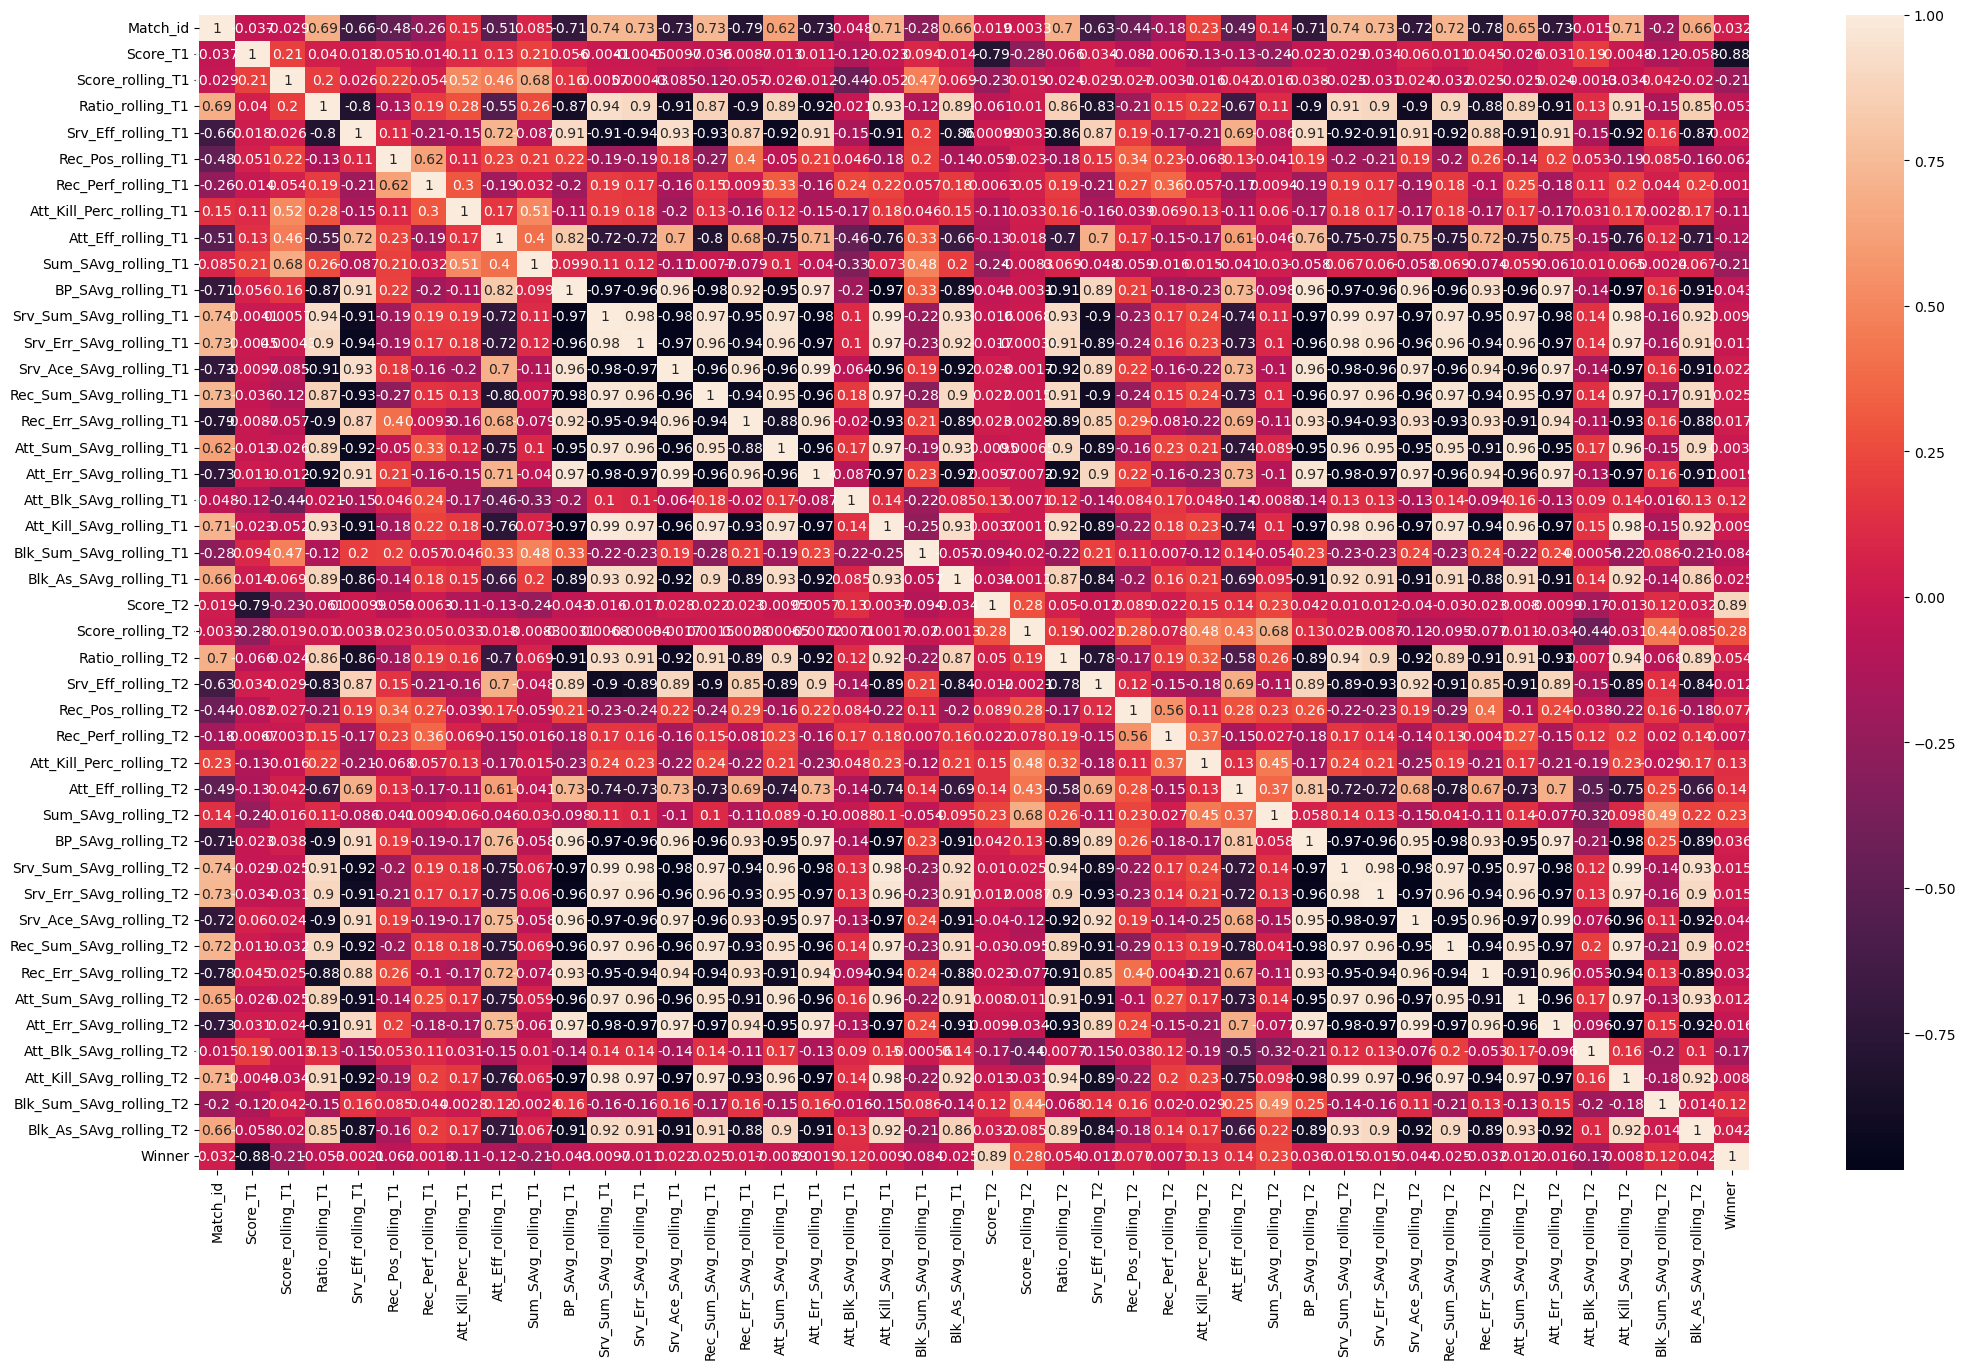

In [47]:
plt.figure(figsize=(25,15))
sns.heatmap(final_df.corr(), annot=True)